# Census Income Project

Feature variables:

    * Age
    * Workclass
    * Fnlwgt
    * Education
    * Education_num
    * Marital_status
    * Occupation
    * Relationship
    * Race
    * Sex
    * Capital_gain
    * Capital_loss
    * Hours_per_week
    * Native_country
    
Target variable:

    * Income

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no missing values

In [7]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

There are nine columns of object data type:
    
    * Workclass
    * Education
    * Marital_status    
    * Occupation        
    * Relationship      
    * Race              
    * Sex 
    * Native_country    
    * Income

                                   Encoding Technique

In [8]:
enc=OrdinalEncoder()

In [9]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [10]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  int64  
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  int64  
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  int64  
 11  Capital_loss    32560 non-null  int64  
 12  Hours_per_week  32560 non-null  int64  
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


Now data is proper for further classifications/analysis

# Visualisation

                                      Visualisation of nomial data

In [12]:
nominal_data=data[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country',
                  'Income']].copy()
nominal_data.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

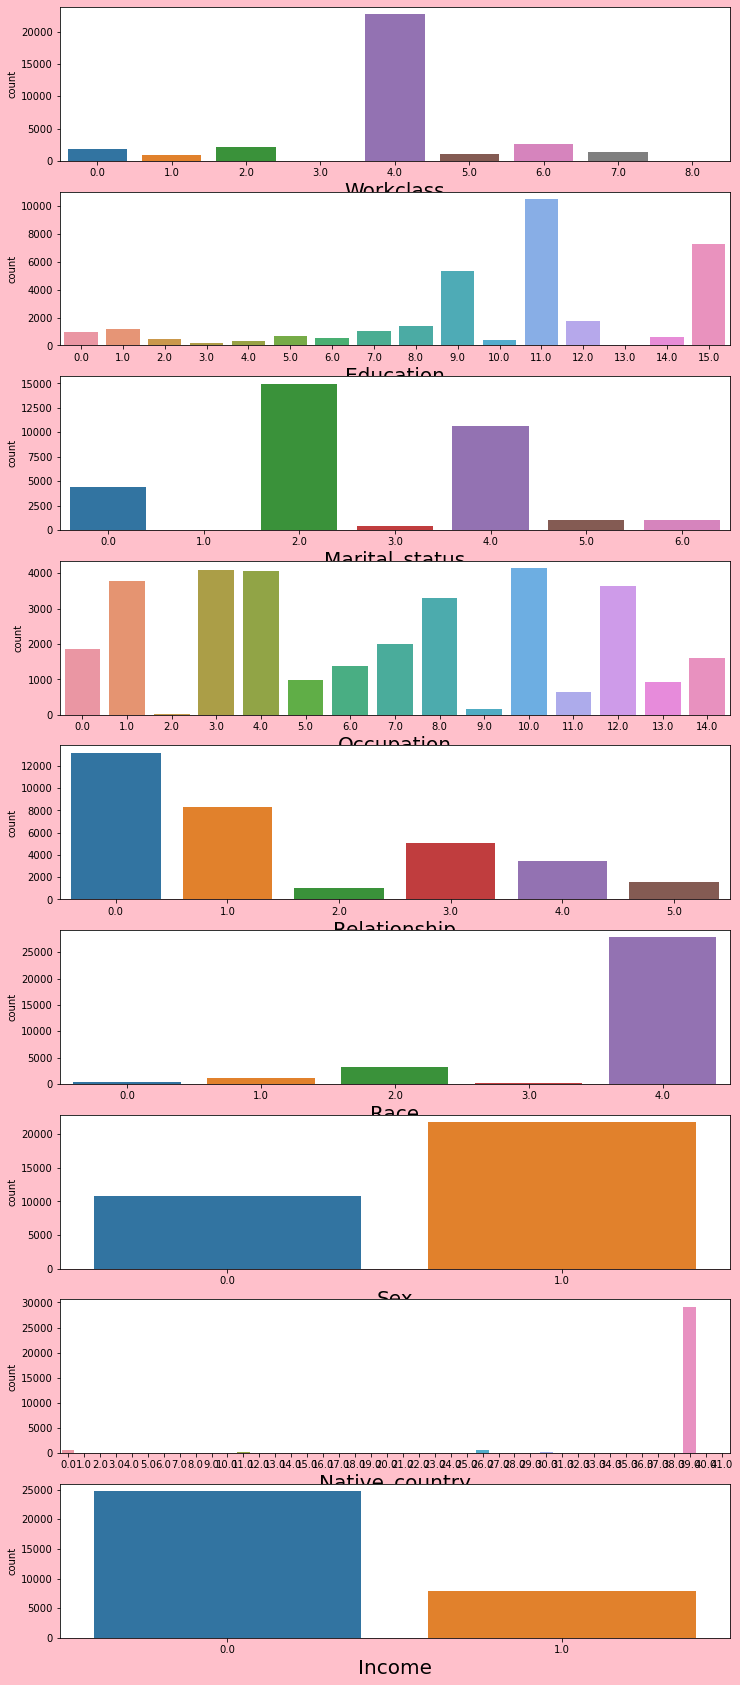

In [14]:
plt.figure(figsize=(12,30),facecolor='pink')
num =1

for column in nominal_data:
    if num <=9:
        ax = plt.subplot(9,1,num)
        sns.countplot(x=column,data=nominal_data)
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()  

In [15]:
print("Count the values of Income:")
data['Income'].value_counts()

Count the values of Income:


0.0    24719
1.0     7841
Name: Income, dtype: int64

Over sample the Income column because the values of >50 (1) are very less in comparison of <=50

                               Visualisation of continuous data

In [16]:
continuous_data=data[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].copy()
continuous_data.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

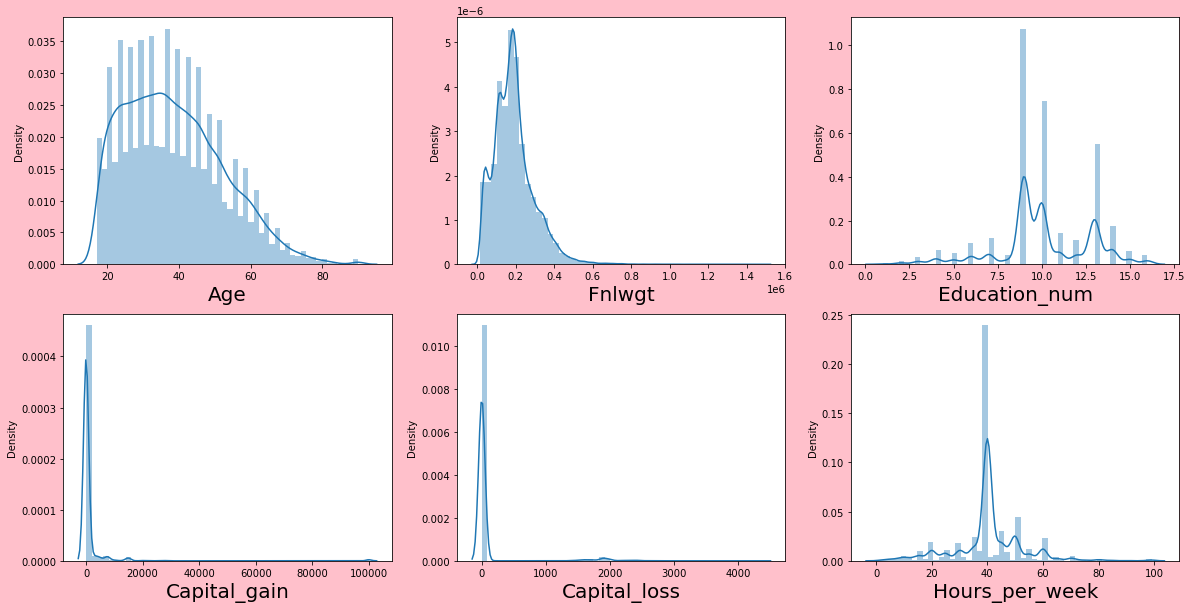

In [17]:
plt.figure(figsize=(20,10),facecolor ='pink')
num =1

for column in continuous_data:
    if num <=6:
        ax = plt.subplot(2,3,num)
        sns.distplot(continuous_data[column])
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()    

# Analaysis

                                        Describe columns

In [18]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


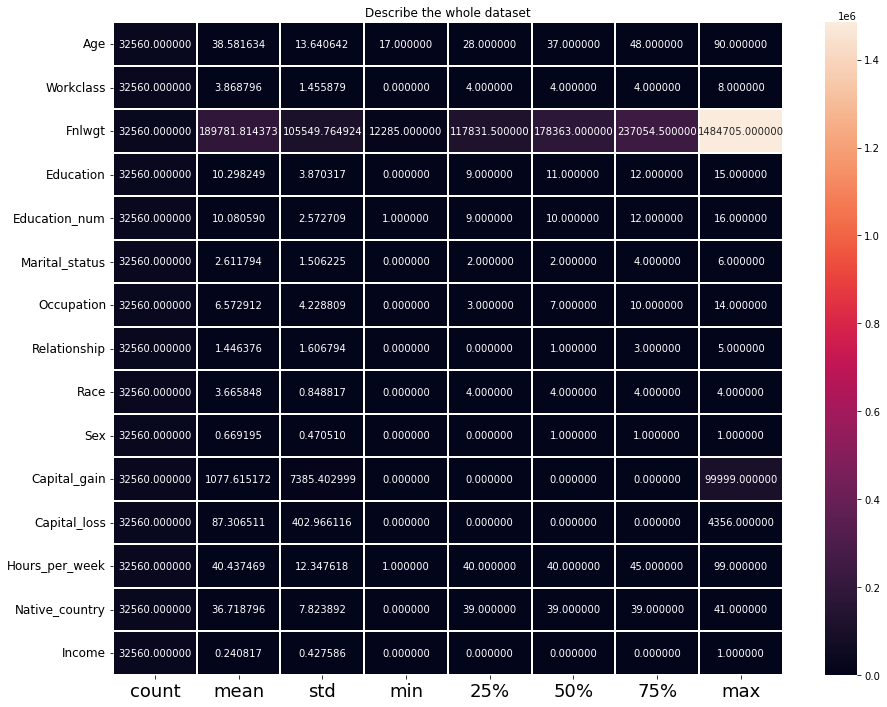

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

There is no null values.

The number of rows and columns are:
    
    * rows = 32560
    * columns = 15
    
The mean, standard deviation, minimum and maximum values are:
    
    * Age
              mean    = 38.58
              std     = 13.64
              minimum =  17.00
              maximum = 90.00
              
    * Workclass
              mean    = 3.86
              std     = 1.45
              minimum = 0.00
              maximum = 8.00
              
    * Fnlwgt
              mean    = 189781.80
              std     = 105545.80
              minimum = 122850.00
              maximum = 148470.50
              
    * Education 
              mean    = 10.29
              std     = 3.87
              minimum = 0.00
              maximum = 15.00
              
    * Education_num
              mean    = 10.08
              std     = 2.57
              minimum = 1.00
              maximum = 16.00
              
    * Marital_status    
              mean    = 2.61
              std     = 1.50
              minimum = 0.00
              maximum = 6.00
              
    * Occupation
              mean    = 6.57
              std     = 4.22
              minimum = 0.00
              maximum = 14.00
              
    * Relationship    
              mean    = 1.44
              std     = 1.60
              minimum = 0.00
              maximum = 5.00
              
    * Race              
              mean    = 3.66
              std     = 0.84
              minimum = 0.00
              maximum = 4.00
              
    * Sex 
              mean    = 0.67
              std     = 0.47
              minimum = 0.00
              maximum = 1.00
              
    * Capital_gain
              mean    = 1077.61
              std     = 7385.40
              minimum = 0.00
              maximum = 99999.00
              
    * Capital_loss
              mean    = 87.30
              std     = 402.96
              minimum = 0.00
              maximum = 4356.00
              
    * Hours_per_week
              mean    = 40.44
              std     = 12.35
              minimum = 1.00
              maximum = 99.00
              
    * Native_country
              mean    = 36.71
              std     = 7.82
              minimum = 0.00
              maximum = 41.00

                                        Correlation

In [20]:
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


<AxesSubplot:>

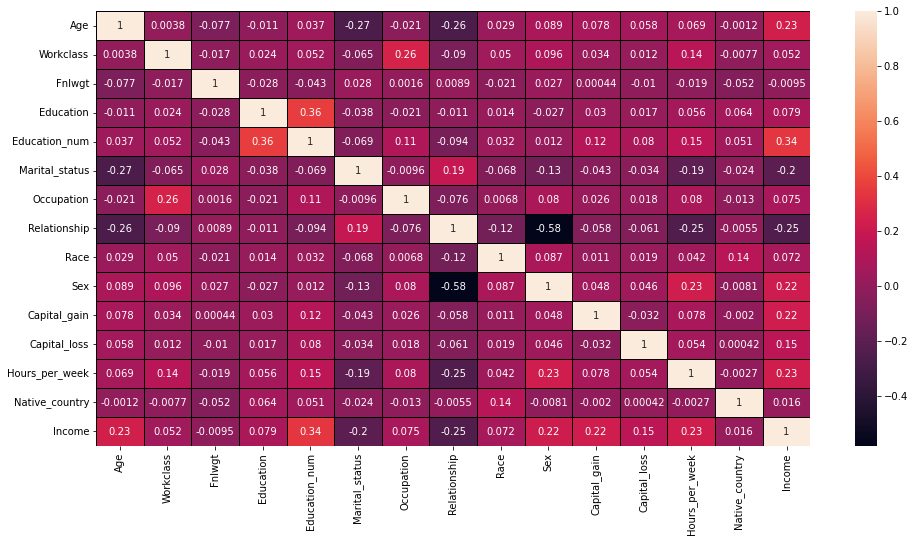

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

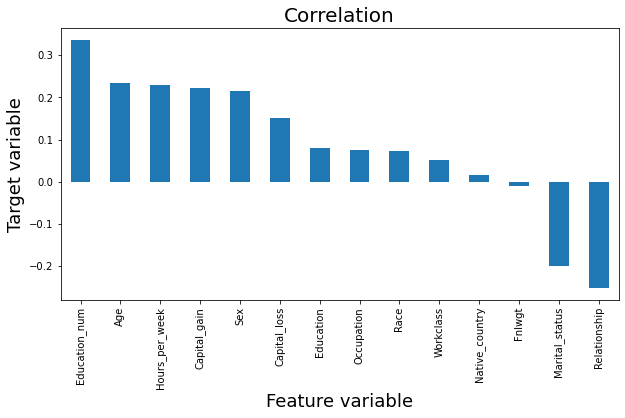

In [22]:
#                            Correlation with the target variable

plt.figure(figsize=(10,5))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

* Age, Workclass, Education, Education_num, Occupation, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country    are positively correlated with the target variable.
* Fnlwgt, Marital_status, Relationship are negatively correlated with the target variable.

The correlation of feature variables with the target variables:
    
    * Age has 23% correlation with the target variable.
    * Workclass has 5.2% correlation with the target variable.
    * Fnlwgt has 0.9% correlation with the target variable.
    * Education has 7.9% correlation with the target variable.
    * Education_num has 34% correlation with the target variable.
    * Marital_status has 20% correlation with the target variable.
    * Occupation has 7.5% correlation with the target variable.
    * Relationship has 25% correlation with the target variable.
    * Race has 7.2% correlation with the target variable.             
    * Sex has 22% correlation with the target variable.
    * Capital_gain has 22% correlation with the target variable.
    * Capital_loss has 15% correlation with the target variable.
    * Hours_per_week has 23% correlation with the target variable.
    * Native_country has 1.6% correlation with the target variable.

                                               Outliers

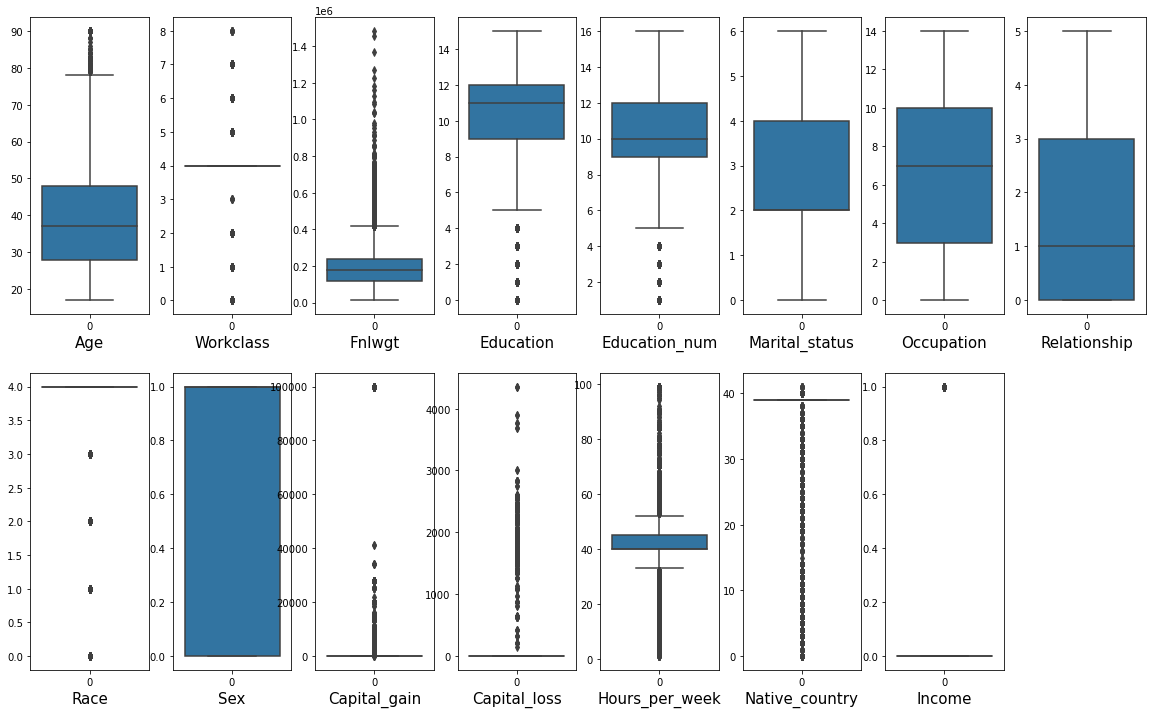

In [23]:
plt.figure(figsize=(20,12))
number = 1

for column in data:
    if number <=15:
        plt.subplot(2,8,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers present in the columns are:
    
    * Age
    * Fnlwgt
    * Education_num
    * Capital_gain
    * Capital_loss
    * Hours_per_week

                                                 Skewness

In [24]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Take threshold range for skewness is (-0.5,0.5)

Skewness is present in the columns are:
    
    * Age
    * Fnlwgt
    * Capital_gain
    * Capital_loss

                                          Variance Inflation Factor

In [25]:
x=data.drop(['Income'],axis=1)
y=data['Income']

In [26]:
# There is maximum column of categorical data so we go with MinMaxScaler()

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.655622,Age
1,8.433868,Workclass
2,3.658318,Fnlwgt
3,9.155022,Education
4,15.341944,Education_num
5,4.008175,Marital_status
6,3.708141,Occupation
7,2.636557,Relationship
8,17.183478,Race
9,4.433423,Sex


There are six column having VIF greater than 5 so,we drop upto four columns one by one and check vif. If still we get vif 
greater than 5 consider the orignal data,otherwise consider the data we get after VIF  

Drop Native_country from the data

In [28]:
df=data.drop(['Native_country'],axis=1)

In [29]:
x=df.drop(['Income'],axis=1)
y=df['Income']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.573477,Age
1,8.366994,Workclass
2,3.643358,Fnlwgt
3,9.008411,Education
4,14.951491,Education_num
5,3.914848,Marital_status
6,3.705677,Occupation
7,2.539184,Relationship
8,14.772069,Race
9,4.379878,Sex


Drop Education_num from the data

In [30]:
df=df.drop(['Education_num'],axis=1)

In [31]:
x=df.drop(['Income'],axis=1)
y=df['Income']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.526345,Age
1,8.329769,Workclass
2,3.636340,Fnlwgt
3,7.265119,Education
4,3.878618,Marital_status
5,3.631159,Occupation
6,2.530467,Relationship
7,14.159606,Race
8,4.378084,Sex
9,1.035556,Capital_gain


Drop Race column from the data

In [32]:
df=df.drop(['Race'],axis=1)

In [33]:
x=df.drop(['Income'],axis=1)
y=df['Income']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.330382,Age
1,7.992630,Workclass
2,3.568873,Fnlwgt
3,6.851954,Education
4,3.719585,Marital_status
5,3.617168,Occupation
6,2.436335,Relationship
7,4.203141,Sex
8,1.034998,Capital_gain
9,1.057038,Capital_loss


Drop Hours_per_week from the column

In [34]:
df=df.drop(['Hours_per_week'],axis=1)

In [35]:
x=df.drop(['Income'],axis=1)
y=df['Income']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.172234,Age
1,7.359788,Workclass
2,3.506276,Fnlwgt
3,6.266193,Education
4,3.704074,Marital_status
5,3.573317,Occupation
6,2.408323,Relationship
7,3.832877,Sex
8,1.033194,Capital_gain
9,1.055216,Capital_loss


Still two columns having VIF greater than 5. So, we do not conside VIF and take our orignal dataset.

In [36]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


                                            Removing Outliers

In [37]:
x=data.drop(['Income'],axis=1)
y=data['Income']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [38]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


Outliers are given in a categorical columns.So we do not remove outliers from the data and consider the orignal one.

                                            Removing Skewness

In [39]:
data['Age']=np.sqrt(data['Age'])
data['Fnlwgt']=np.sqrt(data['Fnlwgt'])
data['Capital_gain']=np.sqrt(data['Capital_gain'])
data['Capital_loss']=np.sqrt(data['Capital_loss'])

In [40]:
data.skew()

Age               0.204335
Workclass        -0.752280
Fnlwgt            0.189066
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

Still two column shows skewness :
    
    * Capital_gain
    * Capital_loss

<AxesSubplot:xlabel='Age', ylabel='Density'>

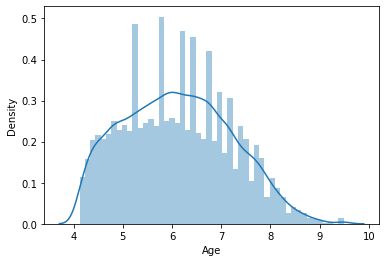

In [41]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

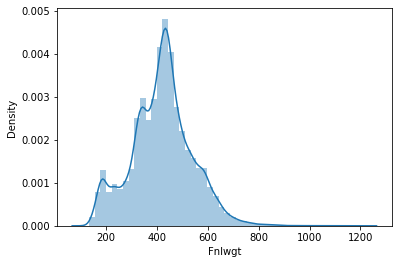

In [42]:
sns.distplot(data['Fnlwgt'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

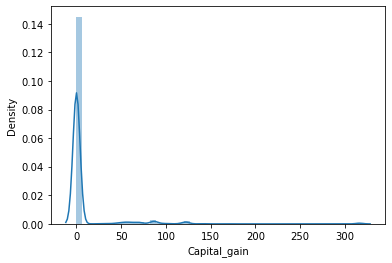

In [43]:
sns.distplot(data['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

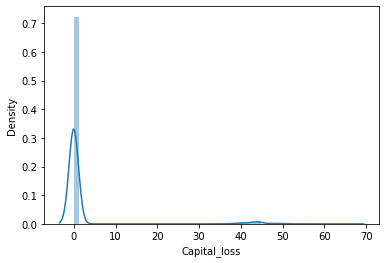

In [44]:
sns.distplot(data['Capital_loss'])

In [45]:
data=data.drop(['Capital_gain','Capital_loss'],axis=1)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,7.071068,6.0,288.636450,9.0,13,2.0,4.0,0.0,4.0,1.0,13,39.0,0.0
1,6.164414,4.0,464.377002,11.0,9,0.0,6.0,1.0,4.0,1.0,40,39.0,0.0
2,7.280110,4.0,484.480134,1.0,7,2.0,6.0,0.0,2.0,1.0,40,39.0,0.0
3,5.291503,4.0,581.729318,9.0,13,2.0,10.0,5.0,2.0,0.0,40,5.0,0.0
4,6.082763,4.0,533.462276,12.0,14,2.0,4.0,5.0,4.0,0.0,40,39.0,0.0


# Model Testing

                                         Over Sampling of Imbalanced data

In [46]:
x=data.drop('Income',axis=1)
y=data['Income']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [47]:
!pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size = 0.80,random_state =41)
print("The no. classes before fit {}".format(Counter(y_train)))

The no. classes before fit Counter({0.0: 4870, 1.0: 1642})


In [50]:
Oversample=SMOTE(0.80)
x_train_ns,y_train_ns=Oversample.fit_resample(x_train,y_train)
print("The no. classes after fit {}".format(Counter(y_train_ns)))

The no. classes after fit Counter({0.0: 4870, 1.0: 3896})


After oversample we get values of Income is:

    * <=50 (0) = 4870
    * >50  (1) = 3896

                                           Logistic Regression

In [51]:
lr=LogisticRegression()

In [52]:
for i in range(0,100):
    x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test_ns)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train_ns,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test_ns,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 80.55128992628993
Testing accuracy score: 80.55896805896806


The model perform very well
random state 1
Training accuracy score: 80.49370393120392
Testing accuracy score: 80.92751842751844


The model perform very well
random state 2
Training accuracy score: 80.57816339066339
Testing accuracy score: 80.4054054054054


The model perform very well
random state 3
Training accuracy score: 80.58200245700246
Testing accuracy score: 80.31326781326781


The model perform very well
random state 4
Training accuracy score: 80.52057739557739
Testing accuracy score: 80.35933660933661


The model perform very well
random state 5
Training accuracy score: 80.37469287469288
Testing accuracy score: 81.2039312039312


The model perform very well
random state 6
Training accuracy score: 80.69333538083538
Testing accuracy score: 79.97542997542998


The model perform very well
random state 7
Training accuracy score: 80.58200245700246
Testin

In [53]:
x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y, test_size=0.20,random_state=83) 

In [54]:
lr.fit(x_train_ns,y_train_ns)
y_pred = lr.predict(x_test_ns)
accuracy = accuracy_score(y_test_ns,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 81.75675675675676


In [55]:
cm= confusion_matrix(y_test_ns,y_pred)
print(cm)

[[4661  316]
 [ 872  663]]


In [56]:
clr=classification_report(y_test_ns,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4977
         1.0       0.68      0.43      0.53      1535

    accuracy                           0.82      6512
   macro avg       0.76      0.68      0.71      6512
weighted avg       0.80      0.82      0.80      6512



In [57]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8052825552825553


At cross fold 3 the cv score is 0.8049140545372033


At cross fold 4 the cv score is 0.8052518427518427


At cross fold 5 the cv score is 0.8051597051597051


At cross fold 6 the cv score is 0.8051291722753494


At cross fold 7 the cv score is 0.8048527417658733


At cross fold 8 the cv score is 0.80497542997543


At cross fold 9 the cv score is 0.8050982114857741




In [58]:
lrscore=cross_val_score(lr,x_scaled,y,cv=2)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 80.52825552825553


                                    K Neighbors Classifier

In [59]:
knn= KNeighborsClassifier()

In [60]:
for i in range(0,100):
    x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    knn.fit(x_train_ns,y_train_ns)
    pred_train=knn.predict(x_train_ns)
    pred_test=knn.predict(x_test_ns)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train_ns,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test_ns,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 86.83200245700246
Testing accuracy score: 81.6031941031941


The model perform very well
random state 1
Training accuracy score: 86.87039312039312
Testing accuracy score: 82.0945945945946


The model perform very well
random state 2
Training accuracy score: 87.07002457002457
Testing accuracy score: 81.97174447174447


The model perform very well
random state 3
Training accuracy score: 86.88191031941031
Testing accuracy score: 82.29422604422605


The model perform very well
random state 4
Training accuracy score: 86.96636977886978
Testing accuracy score: 81.41891891891892


The model perform very well
random state 5
Training accuracy score: 86.95101351351352
Testing accuracy score: 82.06388206388206


The model perform very well
random state 6
Training accuracy score: 87.19671375921376
Testing accuracy score: 81.15786240786241


The model perform very well
random state 7
Training accuracy score: 86.99324324324324
Testin

In [61]:
x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y, test_size=0.20,random_state=75) 

In [62]:
knn.fit(x_train_ns,y_train_ns)
y_pred = knn.predict(x_test_ns)
accuracy = accuracy_score(y_test_ns,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 82.95454545454545


In [63]:
cm= confusion_matrix(y_test_ns,y_pred)
print(cm)

[[4509  453]
 [ 657  893]]


In [64]:
clr=classification_report(y_test_ns,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4962
         1.0       0.66      0.58      0.62      1550

    accuracy                           0.83      6512
   macro avg       0.77      0.74      0.75      6512
weighted avg       0.82      0.83      0.83      6512



In [65]:
for j in range(2,10):
    cv_score=cross_val_score(knn,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8143120393120393


At cross fold 3 the cv score is 0.8197482719822493


At cross fold 4 the cv score is 0.8177825552825553


At cross fold 5 the cv score is 0.8171683046683047


At cross fold 6 the cv score is 0.8174143072843453


At cross fold 7 the cv score is 0.8163395075786257


At cross fold 8 the cv score is 0.8169226044226044


At cross fold 9 the cv score is 0.8176289355028412




In [66]:
knnscore=cross_val_score(knn,x_scaled,y,cv=3)
knnc=knnscore.mean()
print('cross val score:',knnc*100)

cross val score: 81.97482719822493


                                          Decision Tree Classifier

In [67]:
clf=DecisionTreeClassifier()

In [68]:
for i in range(0,100):
    x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    clf.fit(x_train_ns,y_train_ns)
    pred_train=clf.predict(x_train_ns)
    pred_test=clf.predict(x_test_ns)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train_ns,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test_ns,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 99.99616093366093
Testing accuracy score: 77.62592137592138


The model perform very well
random state 1
Training accuracy score: 99.99232186732186
Testing accuracy score: 77.85626535626535


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 78.50122850122851


The model perform very well
random state 3
Training accuracy score: 99.99616093366093
Testing accuracy score: 77.62592137592138


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 78.27088452088452


The model perform very well
random state 5
Training accuracy score: 100.0
Testing accuracy score: 77.31879606879608


The model perform very well
random state 6
Training accuracy score: 99.99616093366093
Testing accuracy score: 76.82739557739558


The model perform very well
random state 7
Training accuracy score: 99.99232186732186
Testing accuracy score: 77.5798525798525

In [69]:
x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = 2)

In [70]:
clf.fit(x_train_ns,y_train_ns)
y_pred = clf.predict(x_test_ns)
accuracy = accuracy_score(y_test_ns,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 78.5472972972973


In [71]:
cm= confusion_matrix(y_test_ns,y_pred)
print(cm)

[[4262  718]
 [ 679  853]]


In [72]:
clr=classification_report(y_test_ns,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      4980
         1.0       0.54      0.56      0.55      1532

    accuracy                           0.79      6512
   macro avg       0.70      0.71      0.70      6512
weighted avg       0.79      0.79      0.79      6512



In [73]:
for j in range(2,10):
    cv_score=cross_val_score(clf,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.7727579852579852


At cross fold 3 the cv score is 0.7757986291309417


At cross fold 4 the cv score is 0.7755528255528256


At cross fold 5 the cv score is 0.7750307125307125


At cross fold 6 the cv score is 0.772881043083355


At cross fold 7 the cv score is 0.7750615687161383


At cross fold 8 the cv score is 0.774416461916462


At cross fold 9 the cv score is 0.7740479925266067




In [74]:
clfscore=cross_val_score(clf,x_scaled,y,cv=3)
clfc=clfscore.mean()
print('cross val score:',clfc*100)

cross val score: 77.55836093457089


                                          Random Forest Classifier

In [75]:
rfc=RandomForestClassifier()

In [76]:
for i in range(0,100):
    x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    rfc.fit(x_train_ns,y_train_ns)
    pred_train=rfc.predict(x_train_ns)
    pred_test=rfc.predict(x_test_ns)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train_ns,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test_ns,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 99.99616093366093
Testing accuracy score: 82.63206388206387


The model perform very well
random state 1
Training accuracy score: 99.99232186732186
Testing accuracy score: 83.63022113022113


The model perform very well
random state 2
Training accuracy score: 100.0
Testing accuracy score: 82.86240786240786


The model perform very well
random state 3
Training accuracy score: 99.99232186732186
Testing accuracy score: 83.07739557739558


The model perform very well
random state 4
Training accuracy score: 100.0
Testing accuracy score: 82.89312039312038


The model perform very well
random state 5
Training accuracy score: 99.99232186732186
Testing accuracy score: 82.86240786240786


The model perform very well
random state 6
Training accuracy score: 99.99616093366093
Testing accuracy score: 82.32493857493857


The model perform very well
random state 7
Training accuracy score: 99.99232186732186
Testing accuracy score: 82.8

In [77]:
x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = 74)

In [78]:
rfc.fit(x_train_ns,y_train_ns)
y_pred = rfc.predict(x_test_ns)
accuracy = accuracy_score(y_test_ns,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 84.07555282555282


In [79]:
cm= confusion_matrix(y_test_ns,y_pred)
print(cm)

[[4550  402]
 [ 635  925]]


In [80]:
clr=classification_report(y_test_ns,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4952
         1.0       0.70      0.59      0.64      1560

    accuracy                           0.84      6512
   macro avg       0.79      0.76      0.77      6512
weighted avg       0.83      0.84      0.84      6512



In [81]:
for j in range(2,10):
    cv_score=cross_val_score(rfc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8264127764127764


At cross fold 3 the cv score is 0.8277335148908821


At cross fold 4 the cv score is 0.8292690417690418


At cross fold 5 the cv score is 0.8290233415233417


At cross fold 6 the cv score is 0.8300676870298048


At cross fold 7 the cv score is 0.8276416114804775


At cross fold 8 the cv score is 0.827487714987715


At cross fold 9 the cv score is 0.828470565592256




In [82]:
rfcscore=cross_val_score(rfc,x_scaled,y,cv=6)
rfcc=rfcscore.mean()
print('cross val score:',rfcc*100)

cross val score: 82.90850313104809


                                               SVC

In [83]:
svc=SVC()

In [84]:
for i in range(0,100):
    x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    svc.fit(x_train_ns,y_train_ns)
    pred_train=svc.predict(x_train_ns)
    pred_test=svc.predict(x_test_ns)
    print("The model perform very well")
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train_ns,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test_ns,pred_test)*100)
    print('\n')

The model perform very well
random state 0
Training accuracy score: 82.59367321867322
Testing accuracy score: 82.27886977886978


The model perform very well
random state 1
Training accuracy score: 82.49385749385749
Testing accuracy score: 82.86240786240786


The model perform very well
random state 2
Training accuracy score: 82.63206388206387
Testing accuracy score: 82.87776412776412


The model perform very well
random state 3
Training accuracy score: 82.63206388206387
Testing accuracy score: 82.3556511056511


The model perform very well
random state 4
Training accuracy score: 82.61286855036855
Testing accuracy score: 82.38636363636364


The model perform very well
random state 5
Training accuracy score: 82.57447788697789
Testing accuracy score: 82.754914004914


The model perform very well
random state 6
Training accuracy score: 82.7664312039312
Testing accuracy score: 82.002457002457


The model perform very well
random state 7
Training accuracy score: 82.63590294840296
Testing ac

In [85]:
x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_scaled,y,test_size = 0.20,random_state = 56) 

In [86]:
svc.fit(x_train_ns,y_train_ns)
y_pred = svc.predict(x_test_ns)
accuracy = accuracy_score(y_test_ns,y_pred)*100
print("accuracy score:",accuracy)

accuracy score: 83.81449631449631


In [87]:
cm= confusion_matrix(y_test_ns,y_pred)
print(cm)

[[4724  277]
 [ 777  734]]


In [88]:
clr=classification_report(y_test_ns,y_pred)
print(clr)

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      5001
         1.0       0.73      0.49      0.58      1511

    accuracy                           0.84      6512
   macro avg       0.79      0.72      0.74      6512
weighted avg       0.83      0.84      0.83      6512



In [89]:
for j in range(2,10):
    cv_score=cross_val_score(svc,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.8237714987714988


At cross fold 3 the cv score is 0.825061547351385


At cross fold 4 the cv score is 0.8246007371007371


At cross fold 5 the cv score is 0.8245085995085996


At cross fold 6 the cv score is 0.8247851732133542


At cross fold 7 the cv score is 0.8245703329072358


At cross fold 8 the cv score is 0.8245085995085994


At cross fold 9 the cv score is 0.8250921060364765




In [90]:
svcscore=cross_val_score(svc,x_scaled,y,cv=9)
svcc=svcscore.mean()
print('cross val score:',svcc*100)

cross val score: 82.50921060364766


The accuracy_score and cv_score of all the models:

    * Logistic Regression
               accuracy_score: 81.75
               cv_score: 80.52

    * K Neighbors Classifier
              accuracy_score: 82.95
              cv_score: 71.97

    * Decision Tree Classifier
              accuracy_score: 78.54
              cv_score: 77.55

    * Random Forest Classifier
              accuracy_score: 84.07
              cv_score: 82.90

    * SVC
              accuracy_score: 83.81
              cv_score: 82.50
              
All the model give better results but Random forest classifier gave best score from all of them, so we use this model for hyper parameter tuning to increase the accuracy  score.               

# Modeling  with Random Forest Classifier

                                      Hyper Parameter Tuning

In [91]:
rfc=RandomForestClassifier()

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
parameters = {'max_features':['auto','sqrt'],
             'max_depth':range(10,25),
             'min_samples_leaf':range(2,5),
             'min_samples_split':range(2,5)}

In [100]:
RCV=RandomizedSearchCV(rfc,parameters,cv=6,n_jobs=-1)
RCV.fit(x_train_ns,y_train_ns)
RCV.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 16}

In [101]:
clf = RandomForestClassifier(min_samples_split=4,min_samples_leaf=4,max_features='sqrt',max_depth=16)
clf.fit(x_train_ns,y_train_ns)
y_pred = clf.predict(x_test_ns)
accuracy_score(y_test_ns,y_pred)*100

85.0583538083538

There is an increment in the accuracy score.
Accuracy score = 84.07 but after tuning we get accuracy score = 85.05

                                 Plot ROC_AUC curve and AUC_score

In [102]:
fpr,tpr,thresholds = roc_curve(y_test_ns,y_pred) 

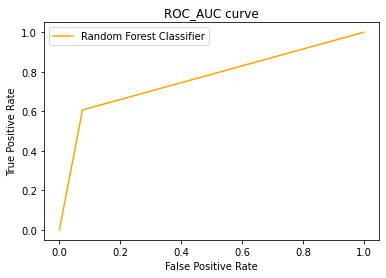

AUC_score 76.55490080011793


In [105]:
plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test_ns,y_pred)*100
print("AUC_score",auc_score)

AUC_score = 76.55 

accuracy_score is better than the AUC_score.

                                      Save the file

In [107]:
joblib.dump(RCV.best_params_,"CensusIncomeProject.pkl")

['CensusIncomeProject.pkl']

                                      Conclusion

In [108]:
Prediction=pd.DataFrame({'Actual data':y_test_ns,"Predicted data":y_pred})
Prediction

,Actual data,Predicted data
9096,0.0,0.0
12860,0.0,0.0
13114,0.0,0.0
28743,0.0,0.0
21512,0.0,0.0
...,...,...
20991,1.0,0.0
9976,0.0,0.0
3084,0.0,0.0
15924,0.0,0.0
